In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from pathlib import Path

#chargement des données

returns = pd.read_csv("../data/returns_monthly.csv",index_col=0, parse_dates=True)

rf = pd.read_csv("../data/rf_monthly.csv",index_col=0, parse_dates=True)["RF"]

In [6]:
#construction du portfeuille de comparaison 

weights = pd.Series({"VFV": 0.45, "XIU": 0.45, "ZAG": 0.10}) #définition des poids avec Panda.Series
port_ret = (returns * weights).sum(axis=1)
port_ret.name = "Portfolio"

In [7]:
#Rendement, écart type annualisé et Sharpe

ANN = 12
excess_pf = port_ret - rf

portfolio_stats = pd.Series({"Annual Return %": port_ret.mean() * ANN * 100,"Volatility %": port_ret.std()* np.sqrt(ANN) * 100,"Sharpe": excess_pf.mean()/ port_ret.std() * np.sqrt(ANN)}).round(2)

portfolio_stats

Annual Return %    10.79
Volatility %       10.94
Sharpe              0.80
dtype: float64

In [8]:
# Sauvegarde de statistique de rendement 
port_ret.to_csv("../data/portfolio_returns.csv")

In [9]:
#Sauvegarde des statistiques 
portfolio_stats.to_csv("../data/portfolio_stats.csv", header=False)

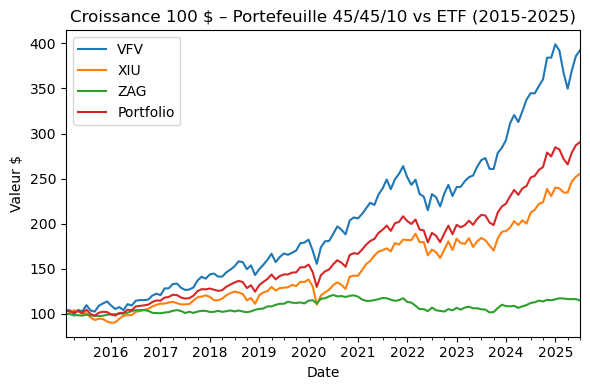

In [10]:
#courbe de croissance 

((1 + returns.join(port_ret)).cumprod() * 100).plot(figsize=(6,4))

plt.title("Croissance 100 $ – Portefeuille 45/45/10 vs ETF (2015-2025)")
plt.ylabel("Valeur $")
plt.tight_layout()
plt.show()